https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [40]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model

In [41]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [42]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

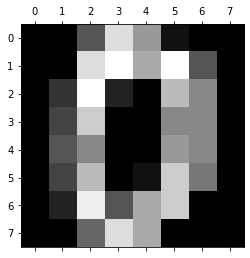

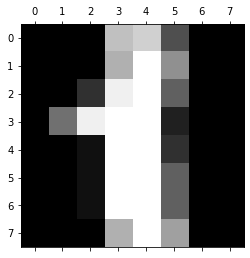

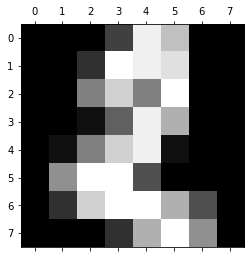

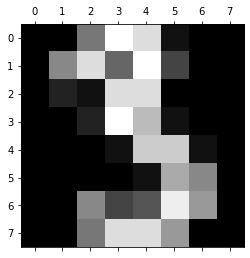

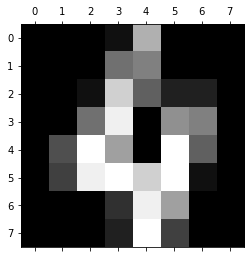

In [43]:
%matplotlib inline
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [44]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = .2)

In [81]:
len(X_train)

1437

In [88]:
model = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

In [89]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
model.score(X_test, y_test)

0.9722222222222222

In [92]:
digits.target[89]

3

In [94]:
model.predict([digits.data[89]])

array([3])

In [101]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [102]:
cm = confusion_matrix(y_test, y_predicted)

In [103]:
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 25,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 46,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

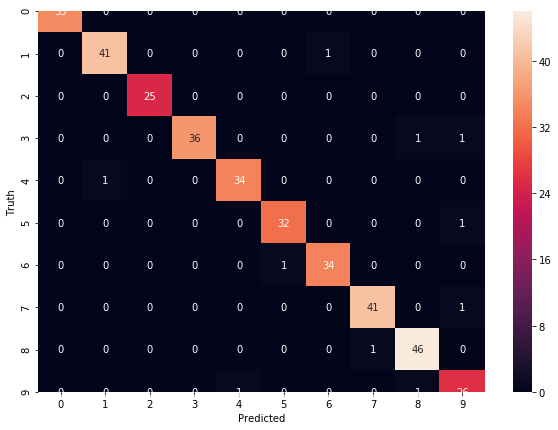

In [112]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')